# Data Visualization with Matplotlib

**Loading data: basic**

In [4]:
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

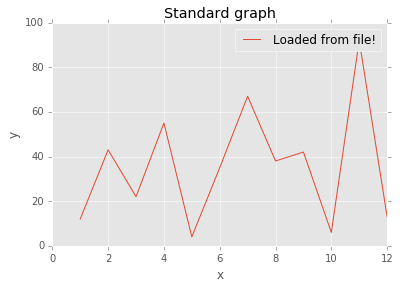

In [8]:
# one example

# set style
plt.style.use('ggplot')

x = []
y = []

with open('Data/lab_data.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='Loaded from file!')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Standard graph')
plt.legend()
plt.show()

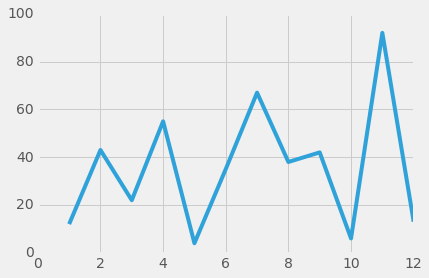

In [11]:
# now using numpy arrays
plt.style.use('fivethirtyeight')
x,y = np.loadtxt('lab_data.csv', delimiter=',', unpack=True)
plt.plot(x,y, label='time series')
plt.show()

**styles** can be customized in the matplotlib directory under styles

In [10]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


## live graphs

In [12]:
import matplotlib.animation as animation

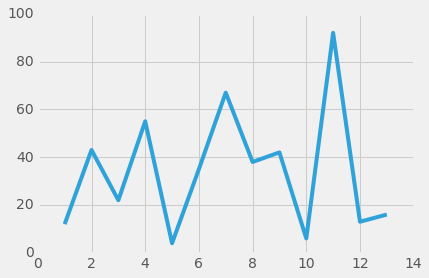

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('lab_data.txt', 'r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        # handles the empty line at the end of a file
        if len(line) > 1:
            x,y = line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs, ys)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

## Basemap plotting

In [15]:
# install basemap